In [1]:
# importing the neceesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Loading dataset

In [2]:
# creating the function for loading the dataset
def load_dataset():
    df = pd.read_csv("boston.csv")
    return df

boston_dataframe = load_dataset()
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Summarizing dataset

In [3]:
def print_summarize_dataset(data):
    pd.set_option('display.max_columns', 10)
    print("Dataset dimension:\n")
    print(data.shape)
    print("\n\nFirst 10 rows of dataset:\n")
    print(data.head(10))
    print("\n\nStatistical summary:\n")
    print(data.describe())

In [4]:
print_summarize_dataset(boston_dataframe)

Dataset dimension:

(506, 14)


First 10 rows of dataset:

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MDEV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5  0.02985   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6  0.08829  12.5   7.87   0.0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7  0.14455  12.5   7.87   0.0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8  0.21124  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9  0.17004  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.71  17.10  18.9

[10 rows x 14 columns]


Statistical summary:

             CRIM       

# Cleaning and Pre-processing

In [5]:
# creating function for cleaning dataset
def clean_dataset(boston_dataframe):
    return boston_dataframe.dropna()

In [6]:
boston_df = clean_dataset(boston_dataframe)

# Data Analysis

In [7]:
# creating function for printing histograms
def print_histograms(boston_dataframe):
    fig, axes = plt.subplots(4, 4, figsize=(12, 10))

#     columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
    
    columns= list(boston_dataframe.columns)
    for i, column in enumerate(columns):
        row = i // 4
        col = i % 4
        sns.histplot(data=boston_dataframe, x=column, ax=axes[row, col])
    fig.delaxes(axes[3, 2])
    fig.delaxes(axes[3, 3])
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle("Univariate Analysis on all Features")
    plt.show()

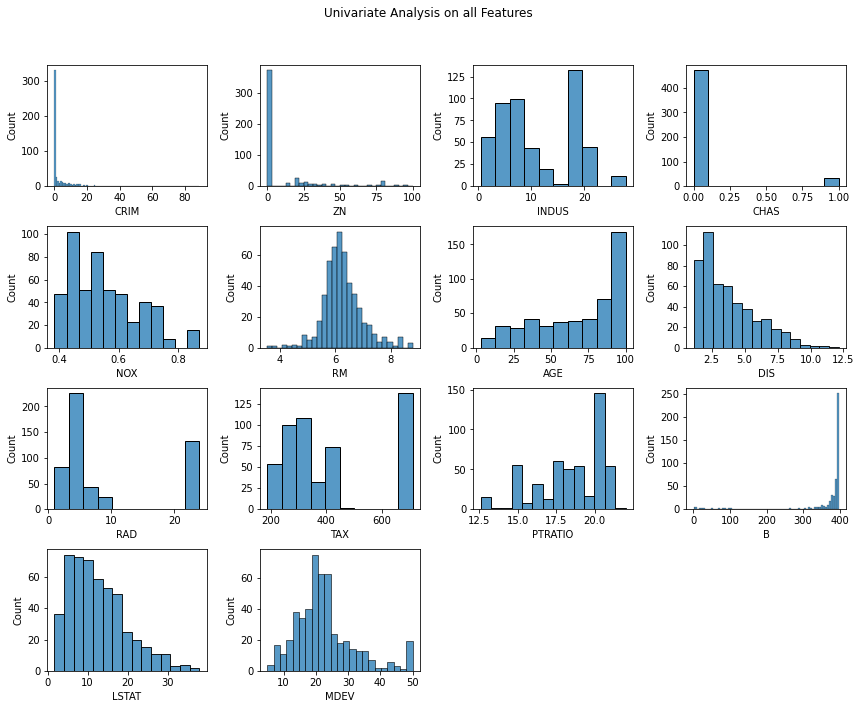

In [8]:
print_histograms(boston_df)

In [9]:
# creating the function computing correlations 
def compute_correlations_matrix(boston_dataframe):
    return boston_dataframe.corr()

In [10]:
compute_correlations_matrix(boston_df)

,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,...,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,...,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,...,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,...,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,...,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,...,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,...,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,...,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,...,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,...,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
# creating the function for the scatter matrix
def print_scatter_matrix(boston_dataframe):
    fig, ax = plt.subplots(figsize=(25,15))
    scatter_matrix(boston_dataframe, alpha=0.3, diagonal='hist', ax=ax)
    return ax

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


<AxesSubplot:>

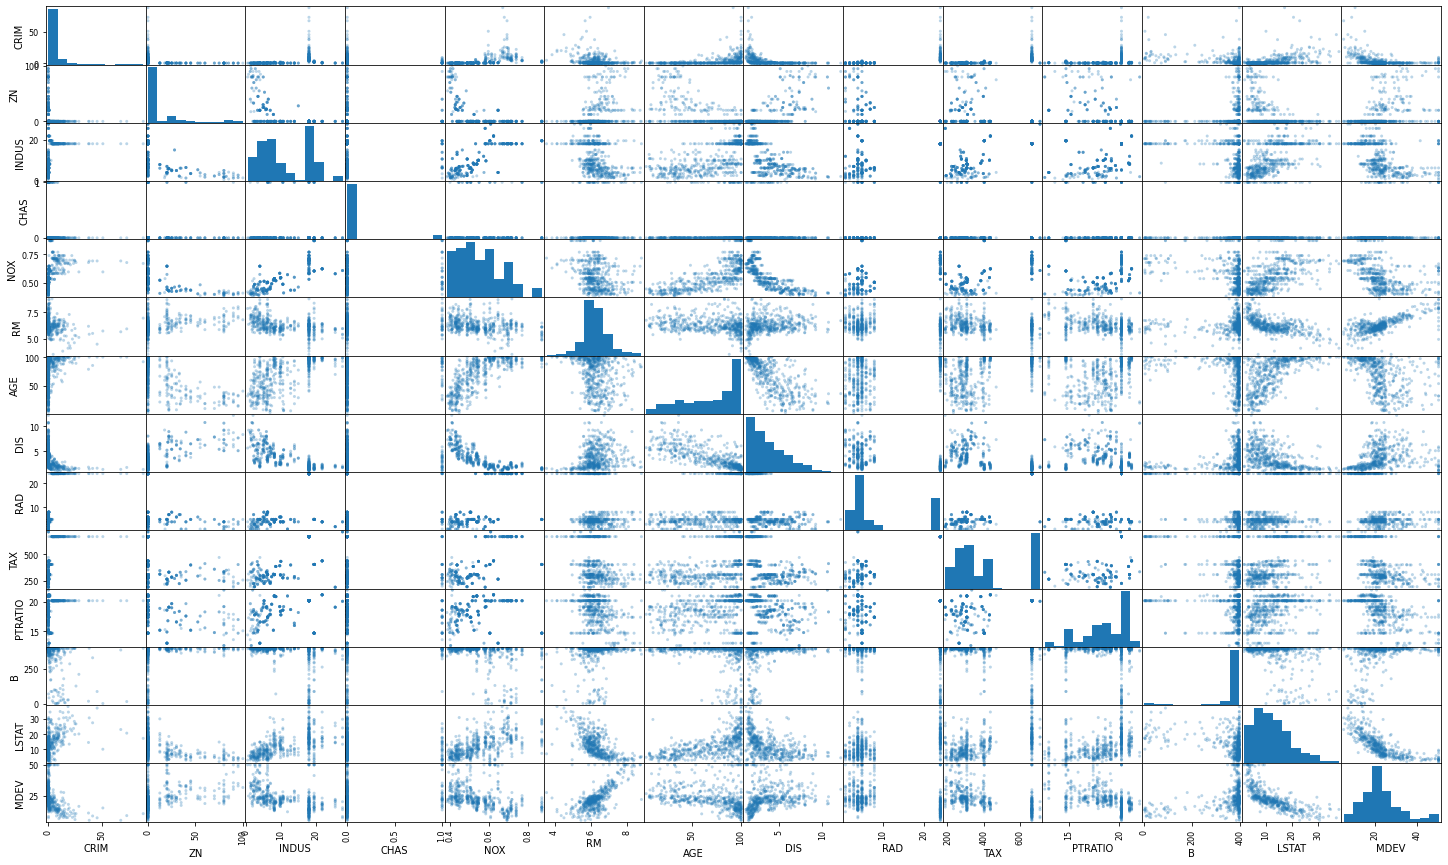

In [12]:
print_scatter_matrix(boston_df)

# Prediction

In [13]:
# creating function for the fiited linear model
def boston_fit_model(boston_dataframe):
    global X_test, y_test
    model_dataset = boston_dataframe[["RM","MDEV"]]
    X=model_dataset.iloc[:, -1].values
    
    y= model_dataset["MDEV"].values
    
    X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train=np.array(X_train).reshape((-1, 1))
    y_train=np.array(y_train)
    
    regressor_mod = LinearRegression()
    
    regressor = regressor_mod.fit(X_train, y_train)
    
    return regressor

In [14]:
# creating a linear fittted model for prediction
def boston_predict(estimator, array_to_predict):
    return estimator.predict(array_to_predict)

In [15]:
estimator=boston_fit_model(boston_df)
data= np.array(X_test).reshape(-1, 1)
prediction = boston_predict(estimator, data)
print(prediction)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4]


# Model Evaluation

In [16]:
# creating function for model evaluation
def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))

In [17]:
print_model_prediction_evaluator(y_test, prediction)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
